In [ ]:
#data cleaning
import pandas as pd
import numpy as np

In [ ]:
#read data
try:
    data = pd.read_csv('2020_rws.csv', encoding='utf-8')
except:
    try:
        data = pd.read_csv('2020_rws.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        data = pd.read_csv('2020_rws.csv', encoding='cp1252')
print(data.shape)
col=data.columns
all=set(col)
for c in col:
    print(c)
    


(1507, 73)
Response ID
What year were you born?
What is your gender?
Which of the following best describes your industry?
Which of the following best describes your industry? (Detailed)
Which of the following best describes your current occupation?
Which of the following best describes your current occupation? (Detailed)
How many people are currently employed by your organisation?
Do you manage people as part of your current occupation?
Which of the following best describes your household?
How long have you been in your current job?
Metro / Regional
Thinking about your current job, how much of your time did you spend remote working last year?
Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely
Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation was well prepared for me to work remotely
Thinking about r

In [ ]:
#print unqiue values 
#data['Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others'].unique()
#print(len(questions))

In [ ]:
#removing rows where the occupation is not remote
rows = ['Labourers', 'Machinery operators and drivers']
data = data[~data['Which of the following best describes your current occupation?'].isin(rows)]

rows = ['Health Professionals', 'Hospitality, Retail and Service Managers', 'Sales Assistants and Salespersons', 'Other Labourers', 'Sports and Personal Service', 'Construction and Mining Labourers', 'Construction Trades', 'Hospitality', 'Other Technicians and Trades', 'Food Preparation Assistants', 'Food Trades', 'Road and Rail Drivers', 'Machine and Stationary Plant Operators', 'Carers and Aides', 'Inquiry Clerks and Receptionists', 'Skilled Animal and Horticultural', 'Cleaners and Laundry', 'Automotive and Engineering Trades', 'Farmers and Farm Managers', 'Mobile Plant Operators', 'Factory Process']
data = data[~data['Which of the following best describes your current occupation? (Detailed)'].isin(rows)]



#How long have you been in your current job?


# Create an array of the given strings
questions = [
    "Response ID",
    "How long have you been in your current job?",
    "Thinking about your current job, how much of your time did you spend remote working last year?",
    "Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely",
    "Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely",
    "Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others",
    "Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely",
    "Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others",
    "Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?",
    "This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour. Please compare your productivity when you work remotely to when you work at your employer’s workplace. Roughly how productive are you, each hour, when you work remotely?",
    "On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Preparing for work and commuting",
    "On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Personal and family time",
    "On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Working",
    "On a day when you do remote work, how many hours would you spend doing the following activities? - Preparing for work and commuting",
    "On a day when you do remote work, how many hours would you spend doing the following activities? - Working",
    "On a day when you do remote work, how many hours would you spend doing the following activities? - Personal and family time",
    "On a day when you do remote work, how many hours would you spend doing the following activities? - Caring and domestic responsibilities"
]

# Output the array to ensure correctness
columns_to_drop=list(set(col)-set(questions))


data = data.drop(columns_to_drop, axis=1)  # Drop the columns that are not in the array

print(data.shape)
print(data.head())

(1364, 16)
   Response ID How long have you been in your current job?  \
0            1                           More than 5 years   
1            2                           More than 5 years   
2            3                           More than 5 years   
3            4                       Between 1 and 5 years   
4            5                           More than 5 years   

  Thinking about your current job, how much of your time did you spend remote working last year?  \
0                                   Rarely or never                                                
1                                                20%                                               
2                                                60%                                               
3                                                20%                                               
4                           Less than 10% of my time                                               

  Thinking abou

In [ ]:
#find the unique values in the columns
for c in data.columns:
    print(c)
    print(data[c].unique())
    print(len(data[c].unique()))
    print()

Response ID
[   1    2    3 ... 1504 1506 1507]
1364

How long have you been in your current job?
['More than 5 years' 'Between 1 and 5 years' 'Between 6 and 12 months']
3

Thinking about your current job, how much of your time did you spend remote working last year?
['Rarely or never ' '20%' '60%' 'Less than 10% of my time' '80%'
 '100% - I spent all of my time remote working' '40%'
 '50% - I spent about half of my time remote working' '30%' '10%' '90%'
 '70%']
12

Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely
[nan 'Somewhat agree' 'Strongly disagree' 'Strongly agree'
 'Somewhat disagree' 'Neither agree nor disagree']
6

Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely
[nan 'Somewhat agree' 'Neither agree nor disagree' 'Strongly agree'
 'Somewh

In [ ]:
#standardize the column values
data= data.dropna()


# Mapping dictionary for qualitative to quantitative conversion
mapping = {
    'Strongly agree': 5,
    'Somewhat agree': 4,
    'Neither agree nor disagree': 3,
    'Somewhat disagree': 2,
    'Strongly disagree': 1
}


# Columns to apply the mapping
columns_to_map = [
    "Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely",
    "Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely",
    "Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others",
    "Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely",
    "Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others"
]


# Apply the mapping to each specified column using a loop
for column in columns_to_map:
    data[column] = data[column].map(mapping)


print(data)




      Response ID How long have you been in your current job?  \
1               2                           More than 5 years   
2               3                           More than 5 years   
3               4                       Between 1 and 5 years   
4               5                           More than 5 years   
5               6                       Between 1 and 5 years   
...           ...                                         ...   
1360         1361                     Between 6 and 12 months   
1362         1363                           More than 5 years   
1364         1365                     Between 6 and 12 months   
1366         1367                     Between 6 and 12 months   
1370         1371                     Between 6 and 12 months   

     Thinking about your current job, how much of your time did you spend remote working last year?  \
1                                                   20%                                               
2            

In [ ]:
percent_mapping = {
    'Less than 10% of my time': 5,
    '10%': 10,
    '20%': 20,
    '30%': 30,
    '40%': 40,
    '50% - I spent about half of my time remote working': 50,
    '50% - About half of my time': 50,
    '60%': 60,
    '70%': 70,
    '80%': 80,
    '90%': 90,
    '100% - I spent all of my time remote working': 100,
    '100% - All of my time': 100,
    'I would prefer not to work remotely': 0
}


# Function to convert text to integer percentages
def convert_to_percentage(value):
    # First, try to use the mapping
    if value in percent_mapping:
        return percent_mapping[value]
    # If not in mapping, convert directly from percentage string
    try:
        return int(value.strip('%'))
    except ValueError:
        # In case there's any unexpected value
        return None



# Columns to apply the conversion
columns_to_convert = ["Thinking about your current job, how much of your time did you spend remote working last year?", "Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?"]


# Apply the conversion to each specified column using a loop
for column in columns_to_convert:
    data[column] = data[column].apply(convert_to_percentage)


print(data)


      Response ID How long have you been in your current job?  \
1               2                           More than 5 years   
2               3                           More than 5 years   
3               4                       Between 1 and 5 years   
4               5                           More than 5 years   
5               6                       Between 1 and 5 years   
...           ...                                         ...   
1360         1361                     Between 6 and 12 months   
1362         1363                           More than 5 years   
1364         1365                     Between 6 and 12 months   
1366         1367                     Between 6 and 12 months   
1370         1371                     Between 6 and 12 months   

      Thinking about your current job, how much of your time did you spend remote working last year?  \
1                                                    20                                                
2          

In [ ]:
data= data.dropna()

In [ ]:
#data cleaing complete:
#visulaize the data
#data.shape
data.head()
#data.columns

,Response ID,How long have you been in your current job?,"Thinking about your current job, how much of your time did you spend remote working last year?","Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely","Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely","Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others","Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely","Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others","Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?","On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Preparing for work and commuting","On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Working","On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Personal and family time","On a day when you do remote work, how many hours would you spend doing the following activities? - Preparing for work and commuting","On a day when you do remote work, how many hours would you spend doing the following activities? - Working","On a day when you do remote work, how many hours would you spend doing the following activities? - Personal and family time","On a day when you do remote work, how many hours would you spend doing the following activities? - Caring and domestic responsibilities"
1,2,More than 5 years,20,4,4,4,4,4,20.0,2.0,7.0,3.0,0.0,7.0,3.0,3.0
2,3,More than 5 years,60,4,3,3,4,3,60.0,6.0,1.0,6.0,5.0,2.0,7.0,7.0
3,4,Between 1 and 5 years,20,1,4,4,5,5,100.0,1.0,9.0,1.0,0.0,9.0,3.0,2.0
4,5,More than 5 years,5,1,5,4,4,5,60.0,1.0,8.0,13.0,0.0,6.0,15.0,3.0
5,6,Between 1 and 5 years,5,4,5,5,5,5,50.0,1.0,8.0,2.0,0.0,7.0,3.0,3.0


In [ ]:
#transform the data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)
#data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
#data_scaled.head()


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#save the data to a csv file
data.to_csv('cleaned_data.csv', index=False)


In [ ]:
#productivity= percentage of time spent working from home((working from home-working from office hours)+(commuting time to office - commuting time whlist working from home)))

In [ ]:
def calculate_productivity(df, wfh_hours_col, office_hours_col, commute_to_office_col, commute_wfh_col):
    # Calculate productivity
    df['productivity'] = ((df[wfh_hours_col] - df[office_hours_col]) + 
                          (df[commute_to_office_col] - df[commute_wfh_col])) / df[wfh_hours_col] * 100

    return df

Index(['cleaned_data', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')
cleaned_data                       Response ID
Unnamed: 1                      Job Experience
Unnamed: 2                   Time Spent Remote
Unnamed: 3      Company encouraged remote work
Unnamed: 4              WFH collaboration ease
Unnamed: 5         WFH personal recommendation
Unnamed: 6                 WFH time preference
Unnamed: 7           In person - commute time 
Unnamed: 8            In person - time working
Unnamed: 9             In person - family time
Unnamed: 10              Remote - commute time
Unnamed: 11                      WFH - working
Unnamed: 12                  WFH - family time
Unnamed: 13           WFH - domestic work time
Name: 0, dtype: object
cleaned_data                       Response ID
Unnamed: 1                

In [ ]:
data=pd.read_csv('clean_data.csv')
#print(data.head())

#data['productivity'] = (data['Time Spent Remote']/100)*((data['WFH - working'] - data['In person - time working']) + (data['In person - commute time '] - data['Remote - commute time']))
print(data['productivity'])

0      1.20
1      0.20
2     -0.05
3      0.00
4     -1.12
       ... 
954    0.93
955    0.00
956   -0.40
957    0.00
958    1.20
Name: productivity, Length: 959, dtype: float64


In [ ]:
print(data.head())

   Response ID           Job Experience  Time Spent Remote  \
0            3        More than 5 years                 60   
1            4    Between 1 and 5 years                 20   
2            5        More than 5 years                  5   
3            6    Between 1 and 5 years                  5   
4            8  Between 6 and 12 months                 80   

   Company encouraged remote work  WFH collaboration ease  \
0                               4                       3   
1                               1                       4   
2                               1                       5   
3                               4                       5   
4                               5                       4   

   WFH personal recommendation  WFH time preference  \
0                            3                   60   
1                            4                  100   
2                            4                   60   
3                            5          

In [ ]:
print(data['productivity'].describe())

count    959.000000
mean       0.597039
std        1.233102
min       -6.000000
25%        0.050000
50%        0.250000
75%        0.800000
max       12.000000
Name: productivity, dtype: float64


In [ ]:
print(data['productivity'].mean())

0.5970385818561


In [ ]:
#save the data
data.to_csv('clean_data.csv', index=False)

In [ ]:
#covariance matrix
#categorize the work expierence column
data['Job Experience']=data['Job Experience'].astype('category')
data['Job Experience']=data['Job Experience'].cat.codes


# Select only numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

                                Response ID  Job Experience  \
Response ID                        1.000000       -0.044562   
Job Experience                    -0.044562        1.000000   
Time Spent Remote                  0.053272       -0.009343   
Company encouraged remote work     0.086131        0.013302   
WFH collaboration ease             0.010034        0.002203   
WFH personal recommendation        0.009095       -0.019340   
WFH time preference               -0.038511       -0.031913   
In person - commute time           0.016221       -0.018765   
In person - time working          -0.070884        0.041112   
In person - family time            0.022013        0.063782   
Remote - commute time              0.166623       -0.039958   
WFH - working                     -0.064186        0.043018   
WFH - family time                 -0.011833        0.068392   
WFH - domestic work time           0.053759        0.050377   
productivity                      -0.032701       -0.00

In [ ]:
#logistics regresion model between working from home and productivity
#productivity ~ WFH collaboration ease + WFH personal recommendation + WFH time preference + Job Experience
import statsmodels.formula.api as smf
# Define the formula for the logistic regression model
# Rename columns to be more formula-friendly
data = data.rename(columns=lambda x: x.strip().replace(' ', '_').replace('-', '_'))

# Convert categorical columns to numeric codes if necessary
data['Job_Experience'] = data['Job_Experience'].astype('category').cat.codes

# Assuming 'productivity' is a binary outcome; if not, binarize it accordingly.
# For demonstration, let's create a binary productivity outcome:
data['productivity'] = (data['productivity'] > data['productivity'].mean()).astype(int)

# Define the formula for the logistic regression model with underscores instead of spaces
formula = 'productivity ~ WFH_collaboration_ease + WFH_personal_recommendation + WFH_time_preference + Job_Experience'

# Fit the logistic regression model
model = smf.logit(formula, data=data).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.574750
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           productivity   No. Observations:                  959
Model:                          Logit   Df Residuals:                      954
Method:                           MLE   Df Model:                            4
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:                  0.1024
Time:                        20:04:09   Log-Likelihood:                -551.19
converged:                       True   LL-Null:                       -614.05
Covariance Type:            nonrobust   LLR p-value:                 3.196e-26
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.7035      0.401     -9.245      0.000   

In [ ]:
#more time spent wor
#linear regression model
# ('WFH - working' - 'In person - time working' ) ~ 'Time Spent Remote '


# Create the target variable (difference between WFH working hours and in-person working hours)
data['work_diff'] = data['WFH - working'] - data['In person - time working']
#renametime spent remote column to TSR
data = data.rename(columns={'Time Spent Remote': 'TSR'})
# Define the formula for the linear regression model
formula = 'work_diff ~ TSR'

# Fit the linear regression model
model = smf.ols(formula, data=data).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              work_diff   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.210
Date:                Sat, 08 Jun 2024   Prob (F-statistic):             0.0129
Time:                        20:11:09   Log-Likelihood:                -1726.8
No. Observations:                 959   AIC:                             3458.
Df Residuals:                     957   BIC:                             3467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2791      0.074      3.752      0.0

In [ ]:
import pandas as pd
from scipy.stats import ttest_rel


df = df.dropna(subset=['WFH - working', 'In person - time working'])

df['productivity_difference'] = df['WFH - working'] - df['In person - time working']

t_stat, p_value = ttest_rel(df['WFH - working'], df['In person - time working'], alternative='greater')

print("T-statistic:", t_stat)
print("P-value:", p_value)


if p_value < 0.05:
    print("There is statistically significant evidence to suggest that productivity while working from home is greater than in-person working.")
else:
    print("There is not statistically significant evidence to suggest that productivity while working from home is greater than in-person working.")

# Further analysis based on t-statistic
if t_stat > 0:
    print("The mean productivity while working from home is greater than in-person working.")
elif t_stat < 0:
    print("The mean productivity while working from home")

NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress

In [ ]:
data = pd.read_csv('clean_data.csv')

In [ ]:
data.head()

,Response ID,Job Experience,Time Spent Remote,Company encouraged remote work,WFH collaboration ease,WFH personal recommendation,WFH time preference,In person - commute time,In person - time working,In person - family time,Remote - commute time,WFH - working,WFH - family time,WFH - domestic work time,productivity
0,3,More than 5 years,60,4,3,3,60,6.0,1.0,6.0,5.0,2.0,7.0,7.0,1.20
1,4,Between 1 and 5 years,20,1,4,4,100,1.0,9.0,1.0,0.0,9.0,3.0,2.0,0.20
2,5,More than 5 years,5,1,5,4,60,1.0,8.0,13.0,0.0,6.0,15.0,3.0,-0.05
3,6,Between 1 and 5 years,5,4,5,5,50,1.0,8.0,2.0,0.0,7.0,3.0,3.0,0.00
4,8,Between 6 and 12 months,80,5,4,4,80,1.0,8.0,4.0,0.4,6.0,4.0,6.0,-1.12


Text(0.5, 1.0, 'Preference of Time Working Remotely')

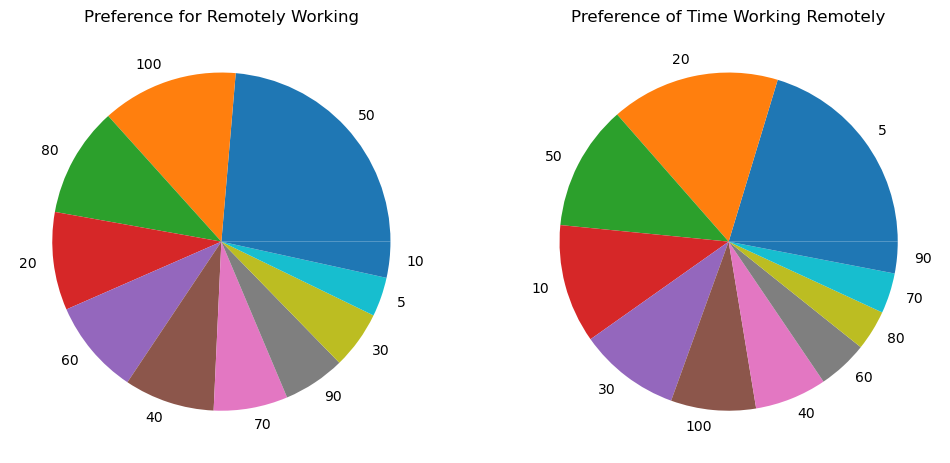

In [ ]:
column = 'Time Spent Remote'
count = data[column].value_counts()

column2 = 'WFH time preference'
count2 = data[column2].value_counts()


fig, axs = plt.subplots(1, 2, figsize = (12, 12))
axs[0].pie(count2, labels = count2.index)
axs[0].set_title('Preference for Remotely Working')
axs[1].pie(count, labels = count.index)
axs[1].set_title('Preference of Time Working Remotely')

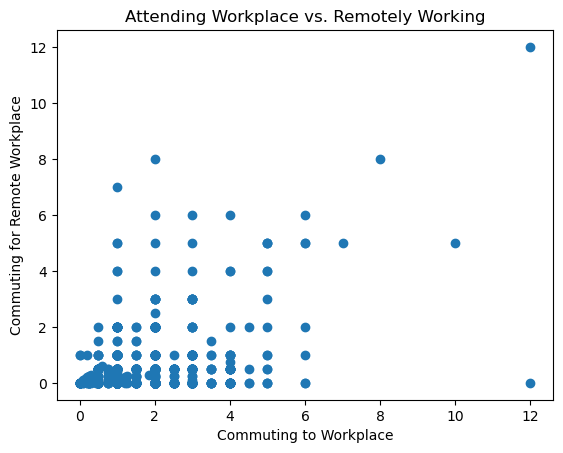

In [ ]:
plt.scatter(data["In person - commute time "], data["Remote - commute time"])
plt.xlabel('Commuting to Workplace')
plt.ylabel('Commuting for Remote Workplace')
plt.title('Attending Workplace vs. Remotely Working')
plt.show()

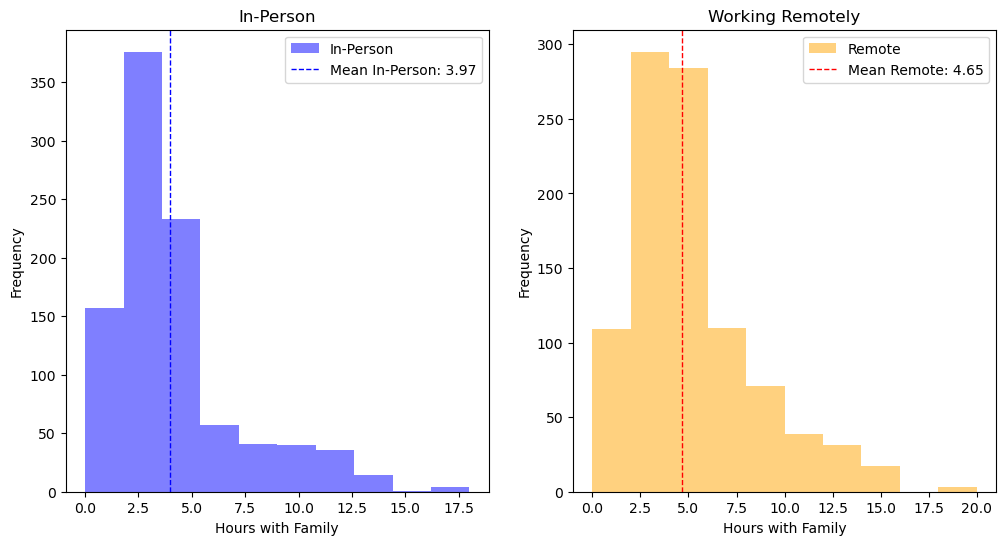

In [ ]:
#Family time data for the two time periods
in_person = data["In person - family time"]
from_home = data["WFH - family time"]

# Mean family time levels
mean_in_person = in_person.mean()
mean_from_home = from_home.mean()

fig, axs = plt.subplots(1, 2, figsize = (12, 6))
axs[0].hist(in_person, alpha=0.5, color = 'blue', label='In-Person')
axs[1].hist(from_home, alpha=0.5, color = 'orange', label='Remote')

# Highlighting the family time levels
axs[0].axvline(mean_in_person, color='blue', linestyle='dashed', linewidth=1, label=f'Mean In-Person: {mean_in_person:.2f}')
axs[1].axvline(mean_from_home, color='red', linestyle='dashed', linewidth=1, label=f'Mean Remote: {mean_from_home:.2f}')

axs[0].set_xlabel('Hours with Family')
axs[0].set_ylabel('Frequency')
axs[0].set_title('In-Person')
axs[1].set_xlabel('Hours with Family')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Working Remotely')
axs[0].legend()
axs[1].legend()

plt.show()

In [ ]:
#data['productivity'] = (data['Time Spent Remote']/100)*((data['WFH - working'] - data['In person - time working']) + (data['In person - commute time '] - data['Remote - commute time']))



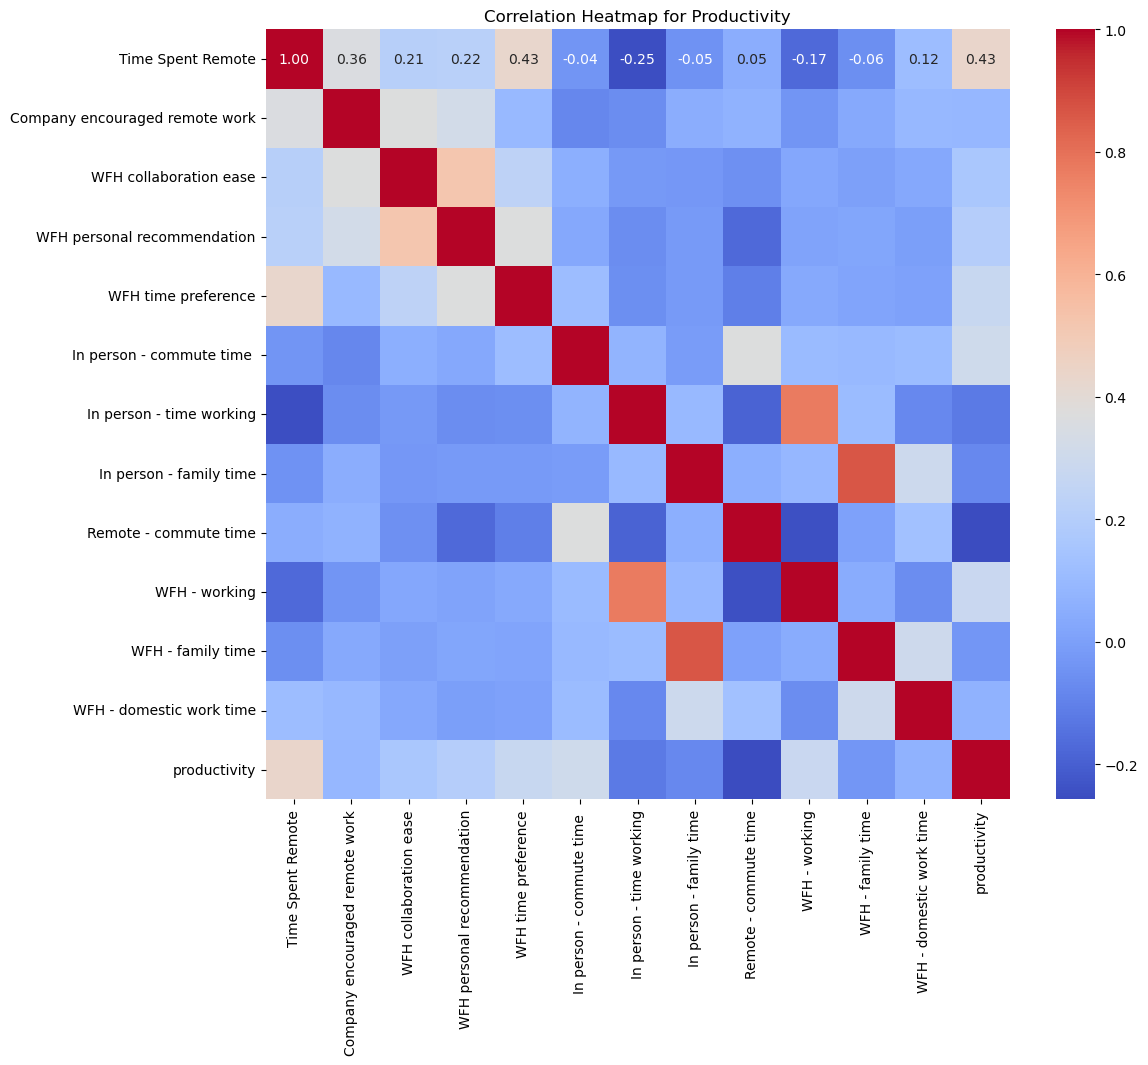

In [ ]:
selected_columns = data[['Time Spent Remote','Company encouraged remote work','WFH collaboration ease',
                        'WFH personal recommendation','WFH time preference','In person - commute time ',
                        'In person - time working','In person - family time','Remote - commute time','WFH - working',
                        'WFH - family time','WFH - domestic work time', 'productivity']]

selected_columns_encoded = pd.get_dummies(selected_columns)
correlation_matrix = selected_columns_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap for Productivity')
plt.show()

In [ ]:
print(data.columns)

Index(['Response ID', 'Job Experience', 'Time Spent Remote',
       'Company encouraged remote work', 'WFH collaboration ease',
       'WFH personal recommendation', 'WFH time preference',
       'In person - commute time ', 'In person - time working',
       'In person - family time', 'Remote - commute time', 'WFH - working',
       'WFH - family time', 'WFH - domestic work time', 'productivity'],
      dtype='object')
